#Tarea 4
#Ricardo Zamora Mennigke
#Visualizacion de Datos

1. [50 puntos] Utilizando la biblioteca altair y la tabla de datos movies de la biblioteca
vega datasets realice lo siguiente:
a) Dise˜ne un gr´afico que permita analizar el presupuesto por a˜no en cada uno de los g´eneros
cinematogr´aficos.
b) Utilizando la biblioteca altair replique el dise˜no del punto anterior.
c) Interprete los resultados.
d) Dise˜ne un gr´afico que permita analizar la variedad de g´eneros cinematogr´aficos tomando
para la comparaci´on el primero a˜no de cada d´ecada.
e) Utilizando la biblioteca altair replique el dise˜no del punto anterior.
f ) Interprete los resultados.

In [3]:
import altair as alt
from vega_datasets import data

peliculas = data.movies()

In [4]:
import pandas as pd

peliculas = peliculas[["Release_Date","Title","Major_Genre","Rotten_Tomatoes_Rating","Production_Budget"]]
peliculas.Title = peliculas.Title.astype(str)
peliculas.Release_Date = pd.to_datetime(peliculas.Release_Date)
peliculas = peliculas.dropna()
peliculas = peliculas.query('19800101 < Release_Date < 20090101')
peliculas                        

,Release_Date,Title,Major_Genre,Rotten_Tomatoes_Rating,Production_Budget
3,1998-09-11,Let's Talk About Sex,Comedy,13.0,300000.0
4,1998-10-09,Slam,Drama,62.0,1000000.0
28,1999-07-30,Twin Falls Idaho,Drama,77.0,500000.0
31,1994-05-06,3 Ninjas Kick Back,Action,17.0,20000000.0
34,1995-12-25,Four Rooms,Comedy,14.0,4000000.0
...,...,...,...,...,...
3196,2008-10-31,Zack and Miri Make a Porno,Comedy,65.0,24000000.0
3197,2007-03-02,Zodiac,Thriller/Suspense,89.0,85000000.0
3198,2006-08-11,Zoom,Adventure,3.0,35000000.0
3199,2005-10-28,The Legend of Zorro,Adventure,26.0,80000000.0


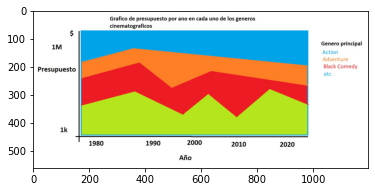

In [6]:
from PIL import Image
import os
import matplotlib.pyplot as plt
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 4")
os.getcwd()
image = Image.open("Tarea 4_Ejercicio 1.a_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

In [9]:
seleccion = alt.selection_multi(fields=['Major_Genre'], bind='legend')

plot = alt.Chart(peliculas, 
                 title = "Presupuesto de peliculas publicadas por año según su género"
                 ).mark_area().encode(
    x = alt.X('year(Release_Date):O', title = "Año"),
    y = alt.Y('sum(Production_Budget):Q',
              title='Presupuesto',
              stack="normalize"),
    color = alt.Color("Major_Genre", title = "Género"),
    opacity=alt.condition(seleccion, alt.value(1), alt.value(0.2))
    ).interactive(
    ).add_selection(seleccion)
                      
plot = plot.configure(
  title = alt.TitleConfig(
    fontSize = 22,
    align = "center",
    color = "#364547"),
  axis = alt.AxisConfig(
    labelFontSize = 16,
    titleFontSize = 18,
    titleColor = "#364547"),
  legend = alt.LegendConfig(
    titleFontSize = 18,
    labelFontSize = 16,
    titleColor = "#364547"),
  axisX = alt.AxisConfig(labelAngle = 0),
  font = 'Roboto')               

In [10]:
plot

alt.Chart(...)

Este grafico muestra que a nivel de presupuesto las peliculas de accion han dominado la cantidad de presupuesto que reciben por muchos anos. Esto se observa por el grosor de cada una de las franjas de color que muestra que accion domina. Asimismo, le siguen las peliculas de aventura, comedia y drama. Esto puede indicar tres situaciones: que estas peliculas son mas costosas de producir que otros generos y/o tienen mayor atencion y por lo tanto reciben mas presupuesto de produccion mayor calidad y/o se producen muchas mas peliculas de estos generos. Por su parte, los generos de Musical, Black Comedy y Western son los que menor presupuesto reciben.

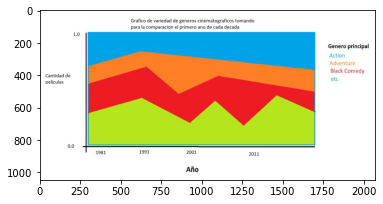

In [11]:
os.getcwd()
image = Image.open("Tarea 4_Ejercicio 1.d_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

In [49]:
seleccion = alt.selection_multi(fields=['Major_Genre'], bind='legend')

plot = alt.Chart(peliculas, 
                 title = "Peliculas publicadas por primer año de cada decada según su género"
                 ).mark_area().encode(
    x = alt.X('year(Release_Date):O', title = "Año"),
    y = alt.Y('count(Major_Genre):Q',
              title='Cantidad de películas',
              stack="normalize"),
    color = alt.Color("Major_Genre", title = "Género"),
    opacity=alt.condition(seleccion, alt.value(15), alt.value(1))
    ).interactive(
    ).add_selection(seleccion)
                      
plot = plot.configure(
  title = alt.TitleConfig(
    fontSize = 22,
    align = "center",
    color = "#364547"),
  axis = alt.AxisConfig(
    labelFontSize = 16,
    titleFontSize = 18,
    titleColor = "#364547"),
  legend = alt.LegendConfig(
    titleFontSize = 18,
    labelFontSize = 16,
    titleColor = "#364547"),
  axisX = alt.AxisConfig(labelAngle = 0),
    font = 'Roboto') 

#plot.set_xticks([1980, 1990, 2000,2010])

In [50]:
plot

alt.Chart(...)

Este grafico muestra que a nivel de cantidad de peliculas por genero las de accion, comedia y drama han dominado la cantidad de peliculas de forma significativa. Asimismo, le siguen las peliculas de aventura. Por su parte, los generos de musical, black comedy y Western son los que menor presupuesto reciben. Esto se infiere del grosor de las franjas de color respectivas. Dada que las conclusiones resultan similares se puede entrever una correlacion de presupuesto con cantidad de peliculas.

2. [50 puntos] Utilizando la biblioteca altair y conjunto de datos base de datos IPS cantonal.xlsx
realice lo siguiente:
a) Dise˜ne un gr´afico que permita analizar la relaci´on entre Tasa de robos y asaltos y
Rezago escolar para los distintos cantones.
b) Utilizando la biblioteca altair replique el dise˜no del punto anterior.
c) Interprete los resultados.
d) Dise˜ne un gr´afico que permita analizar la relaci´on entre Acceso a la cultura y recreaci´on
y Acceso a Educaci´on Superior para los distintos cantones agrupando en 5 grupos
seg´un su ´Indice de Progreso Social, para crear los grupos puede utilizar las t´ecnicas
vista en la clase 2.
e) Utilizando la biblioteca altair replique el dise˜no del punto anterior.
f ) Interprete los resultados.

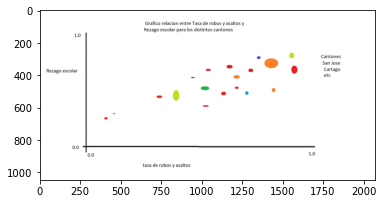

In [66]:
os.getcwd()
image = Image.open("Tarea 4_Ejercicio 2.a_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

In [53]:
import altair as alt
from vega_datasets import data
import pandas as pd

datos_IPS = pd.read_excel(io = "base-de-datos-IPS-cantonal.xlsx", sheet_name = "Datos")

C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\envs\py37ox\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [54]:
datos_IPS.head(15)

,cve,canton,Nutrición y Asistencia Médica Básica,Agua y Saneamiento,Vivienda,Seguridad Personal,Acceso a Conocimientos Básicos,Acceso a Información y Comunicaciones,Salud y Bienestar,Sustentabilidad del Ecosistema,...,Rendición de cuentas,Acceso a la cultura y recreación,Inclusión al adulto mayor,Inclusión a población con discapacidad,Inclusión población indígena,Inclusión de migrantes,Inclusión de hogares con jefatura femenina,Población con educación superior,Escolaridad promedio de las mujeres,Población con educación técnica
0,101,SAN JOSE,82.987394,98.665964,63.891581,43.713222,84.284809,73.758822,64.570213,39.810430,...,95.3,20.552,5.252235,7.709731,7.919016,25.562775,36.874519,29.469448,9.733187,4.329589
1,102,ESCAZU,85.931253,98.121264,86.023111,52.939193,88.650664,77.359311,67.819220,64.554111,...,90.0,15.573,6.169883,6.741573,6.495726,10.226506,29.850746,40.279616,10.583268,4.197981
2,103,DESAMPARADOS,88.541844,94.700064,80.789600,58.999818,88.804140,70.986816,68.089101,48.467391,...,33.3,3.071,5.102137,8.366314,9.358289,18.081342,31.065089,21.696907,9.038890,5.288635
3,104,PURISCAL,90.993459,89.766092,90.227325,86.085942,84.829898,58.456934,76.552294,65.577701,...,97.7,5.454,8.805477,6.519700,8.341232,27.045770,17.241379,20.662035,8.512712,7.423228
4,105,TARRAZU,91.495155,96.414943,88.021404,65.438845,77.763379,55.222121,77.395928,71.499005,...,81.0,8.600,4.359313,10.572391,33.012821,25.316456,11.111111,12.510132,7.431191,3.440599
5,106,ASERRI,86.784734,96.168135,80.561890,66.061311,81.685512,64.817405,71.933404,53.966119,...,58.6,2.246,8.748086,10.624700,15.035800,19.402460,32.380952,15.951560,8.207674,4.264233
6,107,MORA,94.646702,97.904214,89.352456,79.862203,88.759700,65.509299,76.397497,57.845085,...,100.0,5.705,7.371255,7.009694,7.415107,12.348285,33.333333,25.396500,9.231101,5.292150
7,108,GOICOECHEA,79.610864,97.117050,81.540361,59.889931,84.789348,75.439587,72.450279,54.076321,...,95.3,9.211,3.743543,7.386839,7.528409,18.536721,44.827586,28.628814,9.704617,4.284503
8,109,SANTA ANA,90.396596,97.623372,85.832592,70.975364,86.128275,76.802068,77.286935,53.389931,...,96.3,13.436,4.861970,6.687831,7.293355,10.380864,35.714286,37.245247,10.364677,4.317240
9,110,ALAJUELITA,93.168844,98.544700,46.213978,54.301052,72.204454,66.581548,74.415128,52.536875,...,86.7,0.387,9.020097,13.531239,13.857678,26.518178,37.401575,13.850704,8.161253,3.350159


In [83]:
plot = alt.Chart(datos_IPS,
                 title = "Relación entre la tasa de robos y asaltos con el rezago escolar por canton"
                ).mark_circle(size = 100).encode(
    x = alt.X('Rezago escolar:Q',
              scale = alt.Scale(zero = False),
              title = 'Rezago escolar'),
    y = alt.Y('Tasa de robos y asaltos:Q',
              scale = alt.Scale(zero = False), 
              title = 'Tasa de robos y asaltos'),
    color = alt.Color('canton:N'),
     tooltip = datos_IPS.columns.to_list()).interactive()

plot = plot.configure(
    title = alt.TitleConfig(
        fontSize = 18,
        align = "center",
        color = "#364547"),
    axis = alt.AxisConfig(
        labelFontSize = 12,
        titleFontSize = 14,
        titleColor = "#364547"),
    legend = alt.LegendConfig(
        titleFontSize = 12,
        labelFontSize = 14,
        titleColor = "#364547"),
    font = 'Roboto')

In [84]:
plot

alt.Chart(...)

Del grafico resulta curioso denotar que la correlacion entre ambas variables no resulta tan evidente. Se puede observar que dentro de los cantones con mayor rezago esta Desamparados, pero comparativamente presenta una tasa de robos y asaltos baja. Claro se debe tener en cuenta que es una tasa por lo que en la realidad esta cifra puede ser muy alta respecto a la poblacion, ya que Desamparados es el canton mas poblado de Costa Rica, ademas puede que los sistemas de registro y denuncias hechas varien lo que sesga el resultado, cabria analizar los sistemas de medicion. La tasa de robo y asalto mas elevada esta en Abangares.

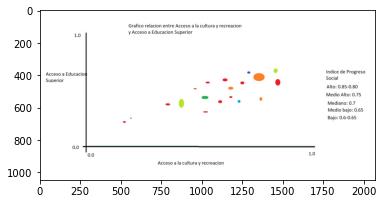

In [68]:
os.getcwd()
image = Image.open("Tarea 4_Ejercicio 2.d_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

In [81]:
plot = alt.Chart(datos_IPS, 
                 title="Relacion entre Acceso a la cultura y recreacion y Acceso a Educacion Superior"
                ).mark_circle(size = 80).encode(
    x = alt.X('Acceso a Educación Superior:Q',
              scale = alt.Scale(zero=False, type='log'),
              title = 'Acceso a Educación Superior'),
    y = alt.Y('Acceso a la cultura y recreación:Q',
              title = 'Acceso a la cultura y recreación',
              scale = alt.Scale(zero=False, type='log')),
    size = alt.Size("ips:Q", title = "Indice de Progreso Social"),
    color = alt.Color('canton:N'),
     tooltip = datos_IPS.columns.to_list()
     ).interactive()
                      
plot = plot.configure(
  title = alt.TitleConfig(
    fontSize = 22,
    align = "center",
    color = "#364547"),
  axis = alt.AxisConfig(
    labelFontSize = 16,
    titleFontSize = 18,
    titleColor = "#364547"),
  legend = alt.LegendConfig(
    titleFontSize = 18,
    labelFontSize = 16,
    titleColor = "#364547"),
  font = 'Roboto')

In [82]:
plot

alt.Chart(...)

A diferencia del grafico anterior se logra discernir mejor una correlacion proporcionalmente ascendente entre ambas variables aunque no muy perfecta mas clara. En este caso el canton con mayor acceso a la educacion superior resulta ser Belen que a su vez tiene un alto acceso a cultura y recreacion. Aun asi existen otros cantones con mayor acceso cultural y recreativo, pero de todas maneras parecen haber mas datos atipicos en unos datos que visualmente parecen bastante correlacionados para ser variables con componente social.